In [1]:
# おまじない
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib notebook

# 分類問題(Classification Problem)

/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


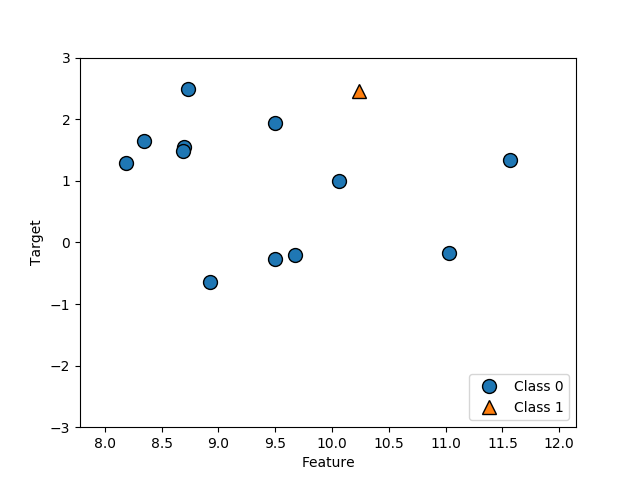

X.shape : (26, 2)


In [2]:
# Classification problem dataset
# データセットの作成
X,y = mglearn.datasets.make_forge()
# データセットをプロット
# Figureは複数一気に出せないようなので↓のFigureが出ているときは電源ボタン(？)を押して消してからこちらを表示する必要がある
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'],loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape : {}'.format(X.shape))

# 回帰問題(Regression Problem)

<IPython.core.display.Javascript object>


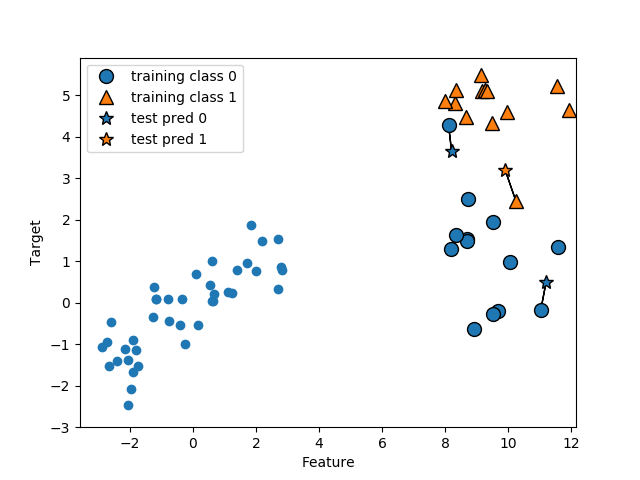

Text(0, 0.5, 'Target')

In [9]:
# regression problem dataset
# Figureは複数一気に出せないようなので↑のFigureが出ているときは電源ボタン(？)を押して消してからこちらを表示する必要がある
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.ylim(-3,3)
plt.plot(X,y,'o')
plt.xlabel('Feature')
plt.ylabel('Target')

# ウィスコンシン乳がんデータセット（実世界の分類問題）

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): {}'.format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [12]:
print('cancer data shape : {}'.format(cancer.data.shape))

cancer data shape : (569, 30)


In [13]:
print('Sample counts per class : {}'.format({n: v for n , v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class : {'malignant': 212, 'benign': 357}


In [14]:
print('Feature names : \n{}'.format(cancer.feature_names))

Feature names : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# ボストン近郊の住宅価格(実世界の回帰問題)

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print('data shape: {}'.format(boston.data.shape))

data shape: (506, 13)


p.35
> ここでは、このデータセットを拡張し、13の測定結果だけを特徴量とするのではなく、特徴量間の積（交互作用（interaction）と呼ぶ）も見ることにする。
> このように導出された特徴量を含めることを特徴量エンジニアリング（feature engineering）と呼ぶ。

In [16]:
X,y = mglearn.datasets.load_extended_boston()
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


p36
> 104の特徴量とは、もとの13の特徴量に、１３の特徴量から２つの特徴量を選ぶ重複ありの組み合わせ９１を足したものである。
> 1つ目の要素を使う組み合わせが13、1つ目の要素を使わず2つ目の要素を使う組み合わせが12、というように13+12+...+1=91

## k-最近傍法(k-NN)

/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


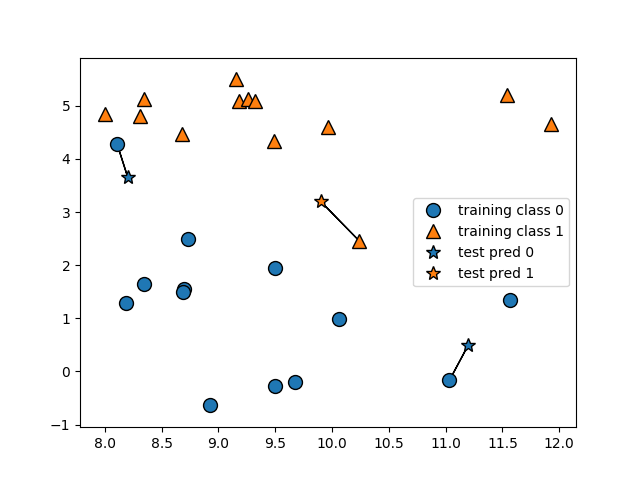

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


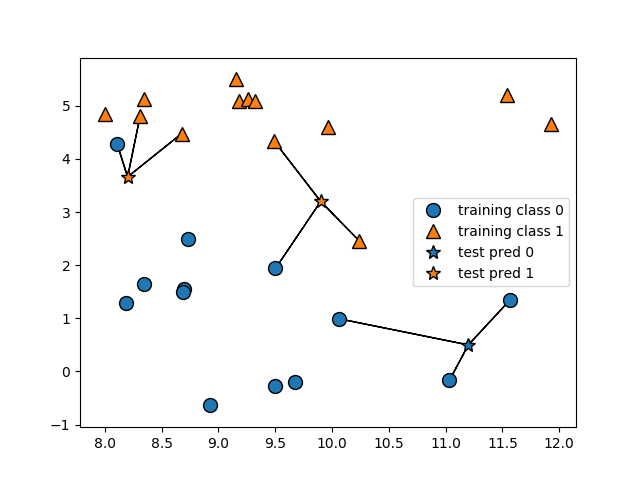

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

p37
> 1-最近傍法アルゴリズムの予測では、近傍点のラベルが予測されたラベルとなる。

> 近傍点は１つとは限らず任意個の、つまりk個の近傍点を考慮することもできる。

> これが、k-近傍法の名前の由来だ。

> 1つ以上の近傍点を考慮に入れる場合には、投票でラベルを決める。

> つまり、個々のテストする点に対して、近傍点のうち、いくつがクラス０に属し、いくつがクラス１に属するのかを数えるのだ。

> そして、最も多く現れたクラスをその点に加える。

> 言い換えればk-最近傍点の多数はのクラスを採用するのだ。

In [21]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
# 3-最近傍法
clf = KNeighborsClassifier(n_neighbors=10)

In [37]:
# training
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
# predict
print('Test set prediction : {}'.format(clf.predict(X_test)))

Test set prediction : [1 0 1 0 1 0 0]


In [39]:
print(X_test.shape)

(7, 2)


In [40]:
print('Test set accuracy : {:.2f}'.format(clf.score(X_test,y_test)))

Test set accuracy : 0.86


In [57]:
print(X.shape)

(26, 2)


In [42]:
print(y)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


<IPython.core.display.Javascript object>


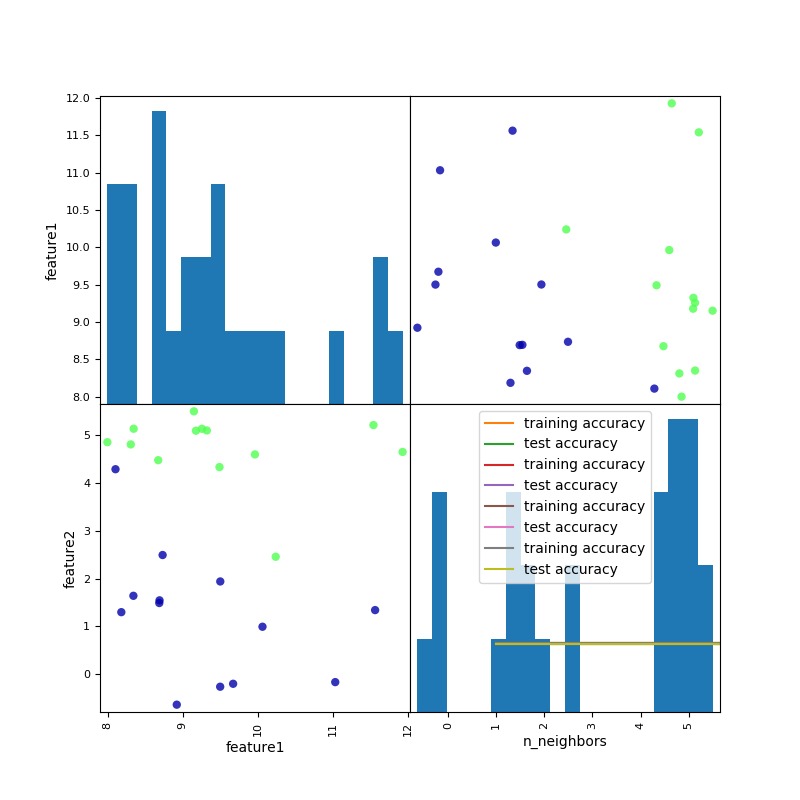

In [51]:
df = pd.DataFrame(X,columns=['feature1','feature2'])
grr = pd.plotting.scatter_matrix(df,c=y,figsize=(8,8),marker='o',hist_kwds={'bins':20},alpha=.8,cmap=mglearn.cm3)

<IPython.core.display.Javascript object>


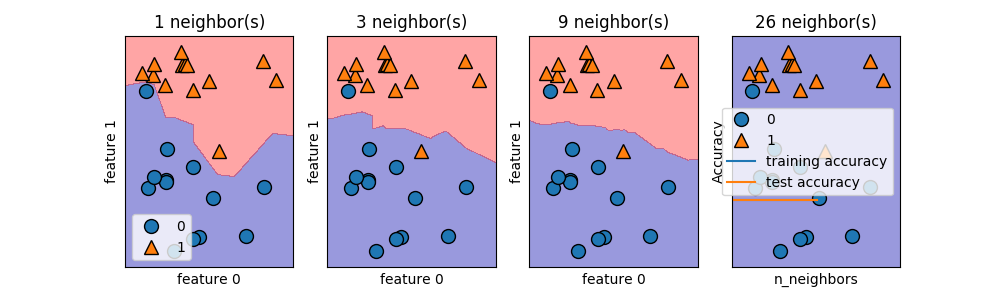

In [61]:
fig, axes = plt.subplots(1,4,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9,26],axes):
    # fitメソッドは自分自身を返すので、
    # 1行でインスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
    

p.39-p.40
> １つの最近傍点のみを用いると、決定境界は訓練データに近くなる。

> より多くの最近傍点を考慮すると、決定境界はよりなめらかになる。

> なめらかな境界は、単純なモデルに対応する。

> つまり、最近傍点が少ない場合は複雑度の高いモデルに対応し、最近傍点が多い場合は複雑度の低いモデルに対応する。

> 極端なケースとして、近傍点数を訓練データセットのすべてのデータポイントの下図にすると、すべてのデータポイントは、全く同じ近傍点（つまりすべての訓練データポイント）を持つことになるので、すべてのの予測結果は同じ、すなわち訓練セットの中で最も多いクラスになる。

近傍点が少ない場合(k=1)と近傍点が多い場合（k=訓練データポイント数）の間に最適なkが存在するはず。k=1では過学習してしまい、k=訓練データポイント数ではアンダーフィッティングになってしまう。

<IPython.core.display.Javascript object>


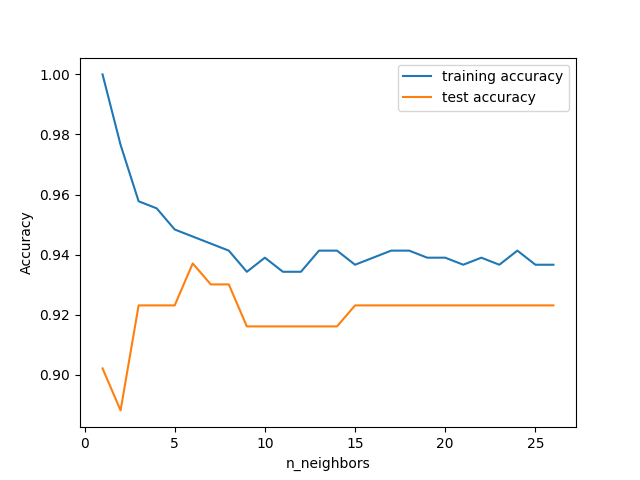

In [74]:
from sklearn.datasets import  load_breast_cancer

# データを読み込み訓練データとテストデータに分割する
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,27)

for neighbor in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(X_train,y_train)
    # 訓練セットにおける精度(accuracy)を記録
    training_accuracy.append(clf.score(X_train,y_train))
    # テストデータを使って汎化性能を測る
    test_accuracy.append(clf.score(X_test,y_test))

# 結果を表示
plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


p.40
> １つの最近傍点のみを考慮する場合には、訓練セットに対する予測は完璧である(training_accuracy = 100%)。
> より多くの最近傍点を考慮すると、モデルはシンプルになり、訓練精度(training_accuracy)は低下する。

> 一方、１つの最近傍点のみを考慮する場合のテストセットに対する精度(test_accuracy)は、より多くの最近傍点を考慮する場合よりも低い。
> これは、１つの最近傍点ではモデルが複雑すぎるからである（overfitting=過学習）。一方、10の最近傍点を考慮すると、モデルはシンプルになりすぎ、性能はさらに低下する(underfitting=適合不足)。